In [2]:
import logging
from utils import logging as lg
lg.set_logging(logging.ERROR)


from skimage.measure import block_reduce
import numpy as np

import logging


from notebook_utils import plot 

from model import base, provider, heatmap_evaluation
import matplotlib.pyplot as plt
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)


In [3]:
from utils import data_provider

In [4]:
dataset = {
    'mnist': data_provider.MNISTData(dir_path='../data/mnist'),
    'fashion-mnist': data_provider.FashionMNISTData(dir_path='../data/fashion-mnist'),
    'ufi-cropped': data_provider.UFICroppedData(dir_path='../data/ufi-cropped')
}

In [5]:
def model_path(network, dataset, seq):
    return '../final-models/%s_network-%s-seq-%d' % (network, dataset, seq)

In [6]:
def count_positive_relevance(model_obj, dataset):
    x = dataset.test2d.x
    y = dataset.test2d.y
    
    rr_inputs = np.zeros((x.shape[0], model_obj.architecture.recur))
    
    with model_obj.get_session() as sess:
        y_pred, y_pred_y_target = sess.run([model_obj.dag.y_pred, model_obj.dag.y_pred_y_target], feed_dict= {
            model_obj.dag.x: x,
            model_obj.dag.y_target: y,
            model_obj.dag.rx: rr_inputs,
            model_obj.dag.keep_prob: 1
        })
        
    relevance = np.sum(y_pred_y_target, axis=1)
    print('Positive relevance for model %s' % model_obj._.experiment_name)
    print('relevance >= 0 : %f' % (np.mean(relevance >= 0)))


# AOPC

In [15]:
def plot_aopc(network, dataset_name, seq, 
              methods=['sensitivity', 'simple_taylor', 'guided_backprop', 'lrp_alpha2_beta1', 'lrp_alpha3_beta2', 'lrp_deep_taylor'],
              path=None):
    data = dataset[dataset_name]
    fig = plt.figure(figsize=(20, 6))
    markers = ['o', '^', '*', 's', 's', 'p']
    liss = ['b--', 'g--', 'k--', 'r--', 'y--', 'r']
    ax = fig.add_subplot(121)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    labels = []
    last_values = []
    
    if path is None:
        path = model_path(network, dataset_name, seq)
        

    model_obj = provider.load(path)
    name = base.BaseNetwork.network_nickname(model_obj._.architecture_name)
    test_data = data.test2d.x
    y = data.test2d.y
    
    test_data = data.test2d.x[:1000, :, :]
    y = data.test2d.y[:1000, :]
    print('data shape')
    print(test_data.shape)

    count_positive_relevance(model_obj, data)

    relevances = []

    print('dataset %s' % dataset_name)
    for i, m in zip(range(len(methods)), methods):
        print('>> method %s' % m )
        relevance = heatmap_evaluation.aopc(model_obj, test_data, y, method=m, flip_function='minus_one')   

#         apoc =  apoc - apoc_random
        area = np.trapz(relevance, dx=1)
        print('area = %f' % area)

        ax.plot(relevance, liss[i], label=m)
        relevances.append(relevance)
        labels.append(m)
        last_values.append(relevance[-1])

    sorted_indices = np.argsort(-np.array(last_values))

    
    sorted_labels = np.array(labels)[sorted_indices]
    last_values = np.array(last_values)[sorted_indices]
    
    position = np.copy(last_values)

    xticks = range(0, len(relevances[0]), 4)

    plt.ylabel("Average functin value $f(x)$")
    plt.xlabel('perturbation steps')
    plt.legend()
    plt.xticks(xticks)
    plt.title('%s$_{%d}$ : %s ' % (name, seq, dataset_name))

    plt.show()

In [16]:
def plot_aopc_all_dataset( network, methods, seq ):
    for d in ['mnist', 'fashion-mnist']:
        plot_aopc(network, methods, d, seq)

## Shallow

data shape
(1000, 28, 28)
Positive relevance for model s2_network-mnist-seq-1---2018-01-29--00-37-19
relevance >= 0 : 0.999200
dataset mnist
>> method sensitivity
using minus_one flip
area = 258.300598
>> method simple_taylor
using minus_one flip
area = 452.062683
>> method guided_backprop
using minus_one flip
area = 175.072311
>> method lrp_alpha2_beta1
using minus_one flip
area = 533.507935
>> method lrp_alpha3_beta2
using minus_one flip
area = 923.921814
>> method lrp_deep_taylor
using minus_one flip
area = 240.164169


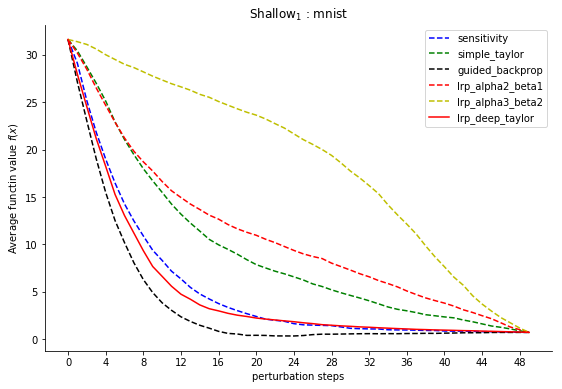

In [9]:
import imp
imp.reload(heatmap_evaluation)

plot_aopc('s2','mnist', 1)

data shape
(1000, 28, 28)
Positive relevance for model s2_network-mnist-seq-4---2018-01-28--15-42-21
relevance >= 0 : 0.992300
dataset mnist
>> method sensitivity
using minus_one flip
area = 33.937405
>> method simple_taylor
using minus_one flip
area = 119.565628
>> method guided_backprop
using minus_one flip
area = 83.167152
>> method lrp_alpha2_beta1
using minus_one flip
area = 160.224487
>> method lrp_alpha3_beta2
using minus_one flip
area = 1347.417725
>> method lrp_deep_taylor
using minus_one flip
area = 646.830017


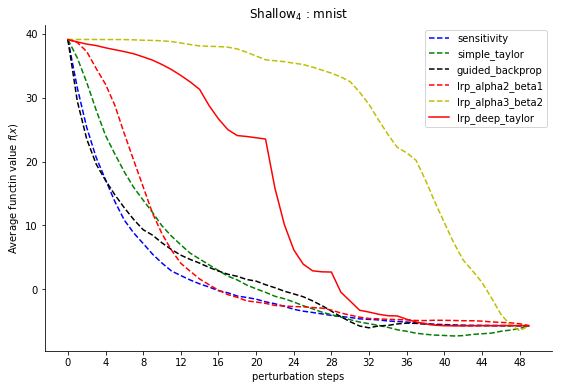

In [106]:
plot_aopc('s2', 'mnist', 4, path='../experiment-results/train-with-additional-pseudo-class/aws-training/s2_network-mnist-seq-4---2018-01-28--15-42-21')

data shape
(1000, 28, 28)
Positive relevance for model s2_network-mnist-seq-4---2017-12-30--12-23-19
relevance >= 0 : 0.980600
dataset mnist
>> method sensitivity
using minus_one flip
area = -179.044510
>> method simple_taylor
using minus_one flip
area = -137.113586
>> method guided_backprop
using minus_one flip
area = -162.477188
>> method lrp_alpha2_beta1
using minus_one flip
area = -58.429909
>> method lrp_alpha3_beta2
using minus_one flip
area = 715.983276
>> method lrp_deep_taylor
using minus_one flip
area = 223.312378


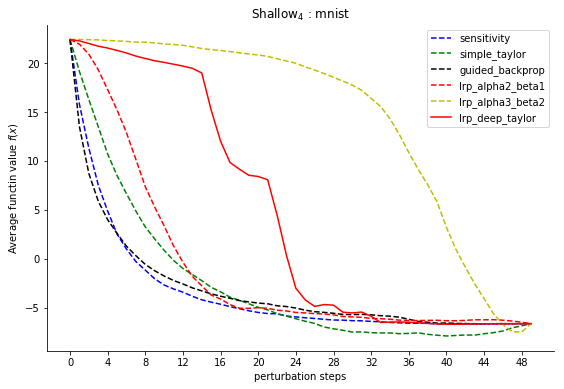

In [107]:
plot_aopc('s2','mnist',4)

data shape
(1000, 28, 28)
Positive relevance for model s3_network-mnist-seq-7---2017-12-30--15-10-26
relevance >= 0 : 0.996500
dataset mnist
>> method sensitivity
using minus_one flip
area = 39.471004
>> method simple_taylor
using minus_one flip
area = 50.891674
>> method guided_backprop
using minus_one flip
area = 32.855724
>> method lrp_alpha2_beta1
using minus_one flip
area = 46.038292
>> method lrp_alpha3_beta2
using minus_one flip
area = 121.081680
>> method lrp_deep_taylor
using minus_one flip
area = 26.536236


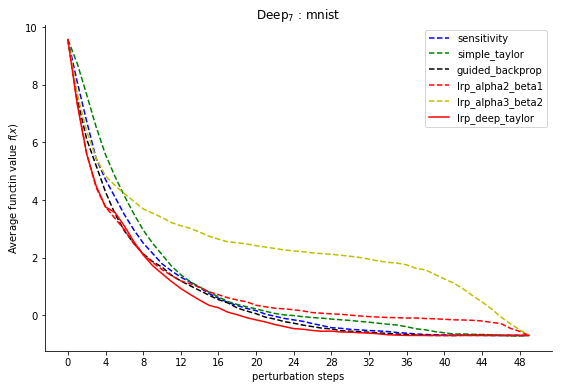

In [113]:
plot_aopc('s3', 'mnist', 7)

data shape
(1000, 28, 28)
Positive relevance for model s3_network-mnist-seq-4---2017-12-30--14-46-26
relevance >= 0 : 0.997700
dataset mnist
>> method sensitivity
using minus_one flip
area = 57.755051
>> method simple_taylor
using minus_one flip
area = 75.743797
>> method guided_backprop
using minus_one flip
area = 77.796227
>> method lrp_alpha2_beta1
using minus_one flip
area = 61.097111
>> method lrp_alpha3_beta2
using minus_one flip
area = 157.337952
>> method lrp_deep_taylor
using minus_one flip
area = 54.348969


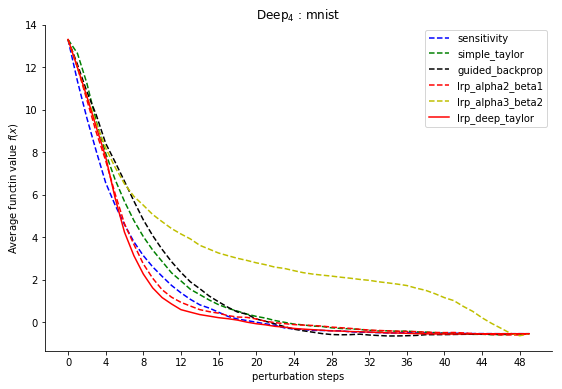

In [109]:
plot_aopc('s3', 'mnist', 4)

data shape
(1000, 28, 28)
Positive relevance for model s3_network-mnist-seq-4---2018-01-28--17-07-01
relevance >= 0 : 1.000000
dataset mnist
>> method sensitivity
using minus_one flip
area = 219.559967
>> method simple_taylor
using minus_one flip
area = 252.560776
>> method guided_backprop
using minus_one flip
area = 243.435455
>> method lrp_alpha2_beta1
using minus_one flip
area = 215.263748
>> method lrp_alpha3_beta2
using minus_one flip
area = 338.236145
>> method lrp_deep_taylor
using minus_one flip
area = 193.718811


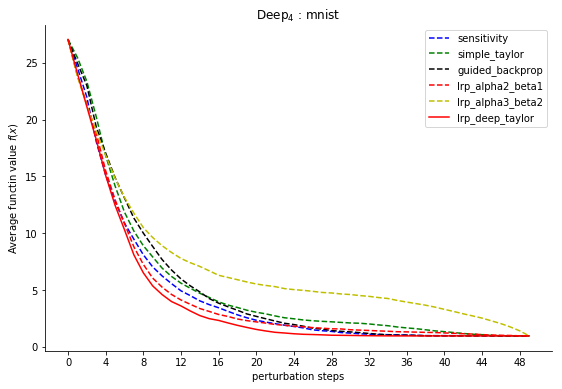

In [110]:
plot_aopc('s3', 'mnist', 4, path="../experiment-results/train-with-additional-pseudo-class/aws-training/s3_network-mnist-seq-4---2018-01-28--17-07-01")

data shape
(1000, 28, 28)
Positive relevance for model s3_network-mnist-seq-7---2018-01-28--17-31-06
relevance >= 0 : 1.000000
dataset mnist
>> method sensitivity
using minus_one flip
area = 281.573853
>> method simple_taylor
using minus_one flip
area = 302.477264
>> method guided_backprop
using minus_one flip
area = 263.754089
>> method lrp_alpha2_beta1
using minus_one flip
area = 263.344177
>> method lrp_alpha3_beta2
using minus_one flip
area = 374.990997
>> method lrp_deep_taylor
using minus_one flip
area = 251.988556


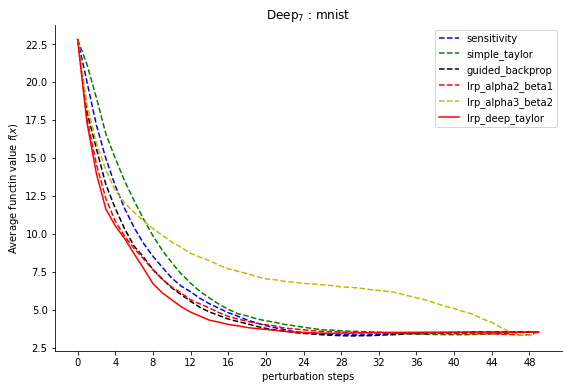

In [112]:
plot_aopc('s3', 'mnist', 7, path="../experiment-results/train-with-additional-pseudo-class/aws-training/s3_network-mnist-seq-7---2018-01-28--17-31-06")

data shape
(1000, 28, 28)
Positive relevance for model deep_4l_network-mnist-seq-1---2017-12-31--14-27-22
relevance >= 0 : 0.996000
dataset mnist
>> method sensitivity
using zero flip
area = 32.635052
>> method simple_taylor
using zero flip
area = -33.855789
>> method guided_backprop
using zero flip
area = 22.722687
>> method lrp_alpha2_beta1
using zero flip
area = -39.446095
>> method lrp_alpha3_beta2
using zero flip
area = 57.777111
>> method lrp_deep_taylor
using zero flip
area = 16.468031


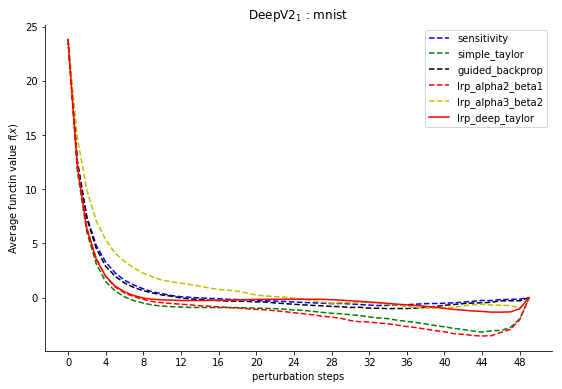

In [54]:
plot_aopc('deep_4l', 'mnist', 1)

data shape
(1000, 28, 28)
Positive relevance for model convdeep_4l_network-mnist-seq-1---2018-01-29--02-30-39
relevance >= 0 : 0.999900
dataset mnist
>> method sensitivity
using minus_one flip
area = 102.675873
>> method simple_taylor
using minus_one flip
area = 103.578659
>> method guided_backprop
using minus_one flip
area = 72.399605
>> method lrp_alpha2_beta1
using minus_one flip
area = 77.521721
>> method lrp_alpha3_beta2
using minus_one flip
area = 157.792587
>> method lrp_deep_taylor
using minus_one flip
area = 78.264030


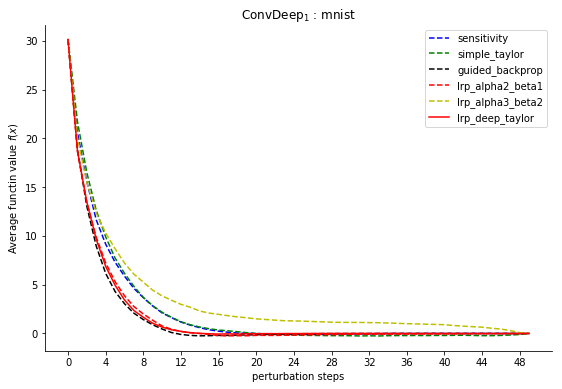

In [17]:
plot_aopc('convdeep_4l', 'mnist', 1)

data shape
(1000, 28, 28)
Positive relevance for model convdeep_4l_network-mnist-seq-1---2018-01-29--23-20-56
relevance >= 0 : 0.999900
dataset mnist
>> method sensitivity
using minus_one flip
area = 97.287193
>> method simple_taylor
using minus_one flip
area = 109.084366
>> method guided_backprop
using minus_one flip
area = 72.766289
>> method lrp_alpha2_beta1
using minus_one flip
area = 77.566002
>> method lrp_alpha3_beta2
using minus_one flip
area = 146.812424
>> method lrp_deep_taylor
using minus_one flip
area = 84.562218


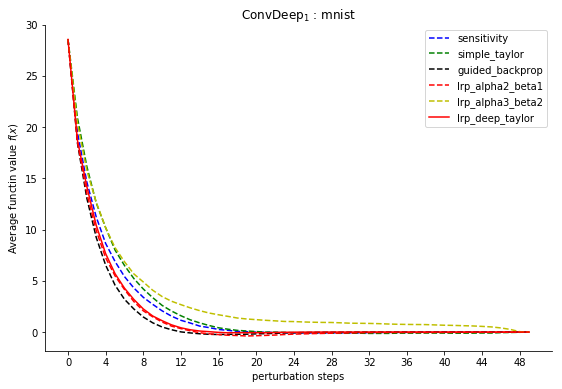

In [18]:
plot_aopc('convdeep_4l', 'mnist', 1, path="../experiment-results/train-with-additional-pseudo-class/aws-training/convdeep_4l_network-mnist-seq-1---2018-01-29--23-20-56")

data shape
(1000, 28, 28)
Positive relevance for model convdeep_4l_network-fashion-mnist-seq-1---2018-01-29--03-02-49
relevance >= 0 : 0.999100
dataset fashion-mnist
>> method sensitivity
using minus_one flip
area = 288.872498
>> method simple_taylor
using minus_one flip
area = 371.441803
>> method guided_backprop
using minus_one flip
area = 200.755707
>> method lrp_alpha2_beta1
using minus_one flip
area = 205.649414
>> method lrp_alpha3_beta2
using minus_one flip
area = 276.916199
>> method lrp_deep_taylor
using minus_one flip
area = 215.612503


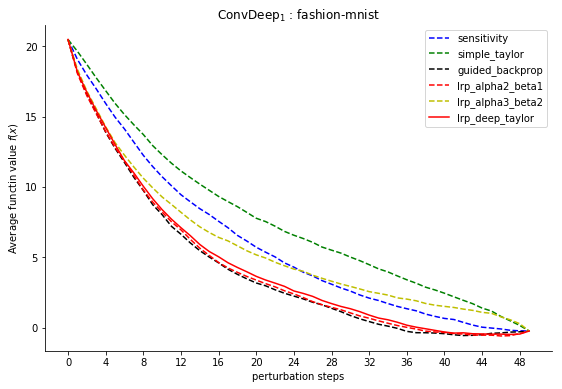

In [115]:
plot_aopc('convdeep_4l', 'fashion-mnist', 1)

data shape
(1000, 28, 28)
Positive relevance for model convdeep_4l_artificial_output-fashion-mnist-seq-1---2018-01-25--11-32-53
relevance >= 0 : 0.999100
dataset fashion-mnist
>> method sensitivity
using minus_one flip
area = 375.248840
>> method simple_taylor
using minus_one flip
area = 464.699219
>> method guided_backprop
using minus_one flip
area = 281.662170
>> method lrp_alpha2_beta1
using minus_one flip
area = 304.081635
>> method lrp_alpha3_beta2
using minus_one flip
area = 384.273163
>> method lrp_deep_taylor
using minus_one flip
area = 296.509430


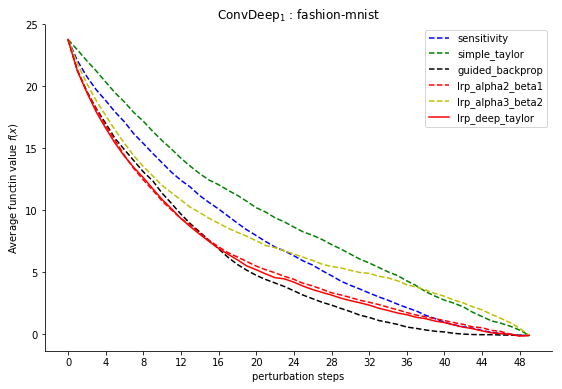

In [116]:
plot_aopc('convdeep_4l', 'fashion-mnist', 1, path="../experiment-results/aws-training/convdeep_4l_artificial_output-fashion-mnist-seq-1---2018-01-25--11-32-53")

(?, 11)
data shape
(1000, 28, 28)
Positive relevance for model convdeep_4l_artificial_output-fashion-mnist-seq-1---2018-01-27--13-37-13
relevance >= 0 : 1.000000
dataset fashion-mnist
>> method sensitivity
using zero flip
area = 1277.801880
>> method simple_taylor
using zero flip
area = 1139.186157
>> method guided_backprop
using zero flip
(?, 11)
(?, 11)
area = 1185.513062
>> method lrp_alpha2_beta1
using zero flip
area = 1149.742920
>> method lrp_alpha3_beta2
using zero flip
area = 1255.646362
>> method lrp_deep_taylor
using zero flip
area = 1194.361816


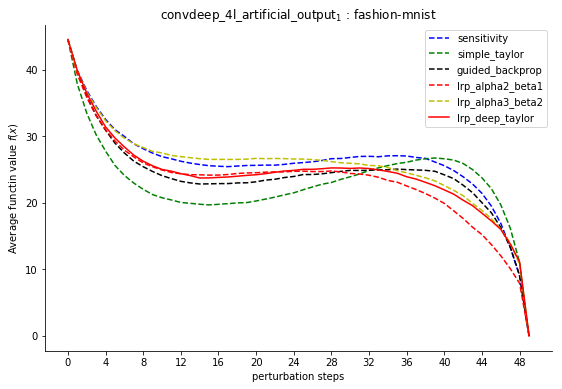

In [59]:
# constant 10 
plot_aopc('convdeep_4l', 'fashion-mnist', 1, path="../experiment-results/aws-training/convdeep_4l_artificial_output-fashion-mnist-seq-1---2018-01-27--13-37-13")

(?, 11)
data shape
(1000, 28, 28)
Positive relevance for model convdeep_4l_artificial_output-fashion-mnist-seq-4---2018-01-25--12-21-03
relevance >= 0 : 0.999500
dataset fashion-mnist
>> method sensitivity
using zero flip
area = 271.940643
>> method simple_taylor
using zero flip
area = 122.996666
>> method guided_backprop
using zero flip
(?, 11)
(?, 11)
area = 218.685104
>> method lrp_alpha2_beta1
using zero flip
area = 174.778107
>> method lrp_alpha3_beta2
using zero flip
area = 227.814072
>> method lrp_deep_taylor
using zero flip
area = 232.567551


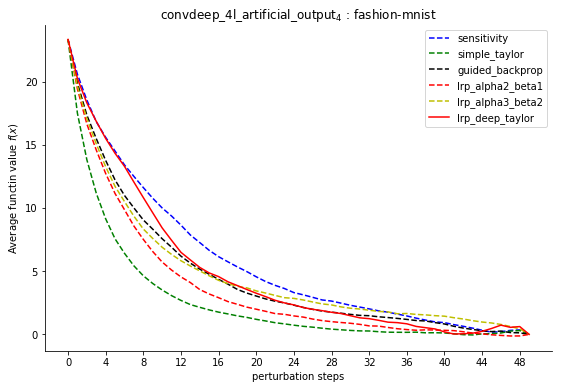

In [60]:
plot_aopc('convdeep_4l', 'fashion-mnist', 4, path="../experiment-results/aws-training/convdeep_4l_artificial_output-fashion-mnist-seq-4---2018-01-25--12-21-03")

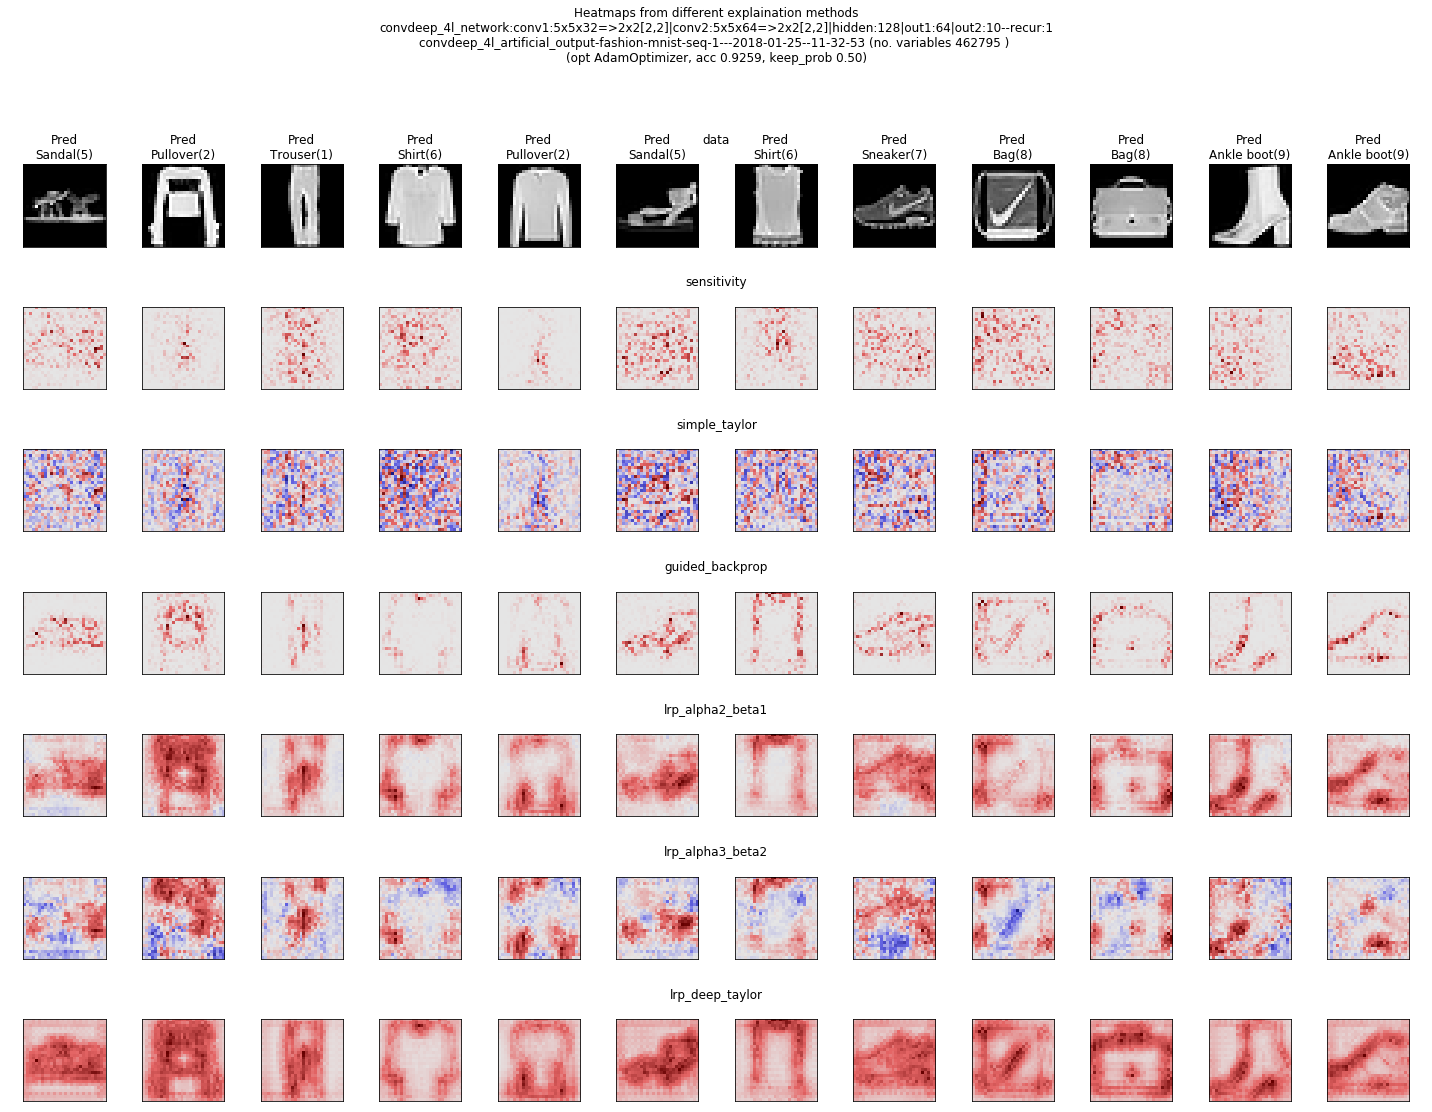

In [61]:
plot.plot_relevance_methods(
    "../experiment-results/aws-training/convdeep_4l_artificial_output-fashion-mnist-seq-1---2018-01-25--11-32-53",
    dataset['fashion-mnist']
    )

(?, 11)
(?, 11)
(?, 11)


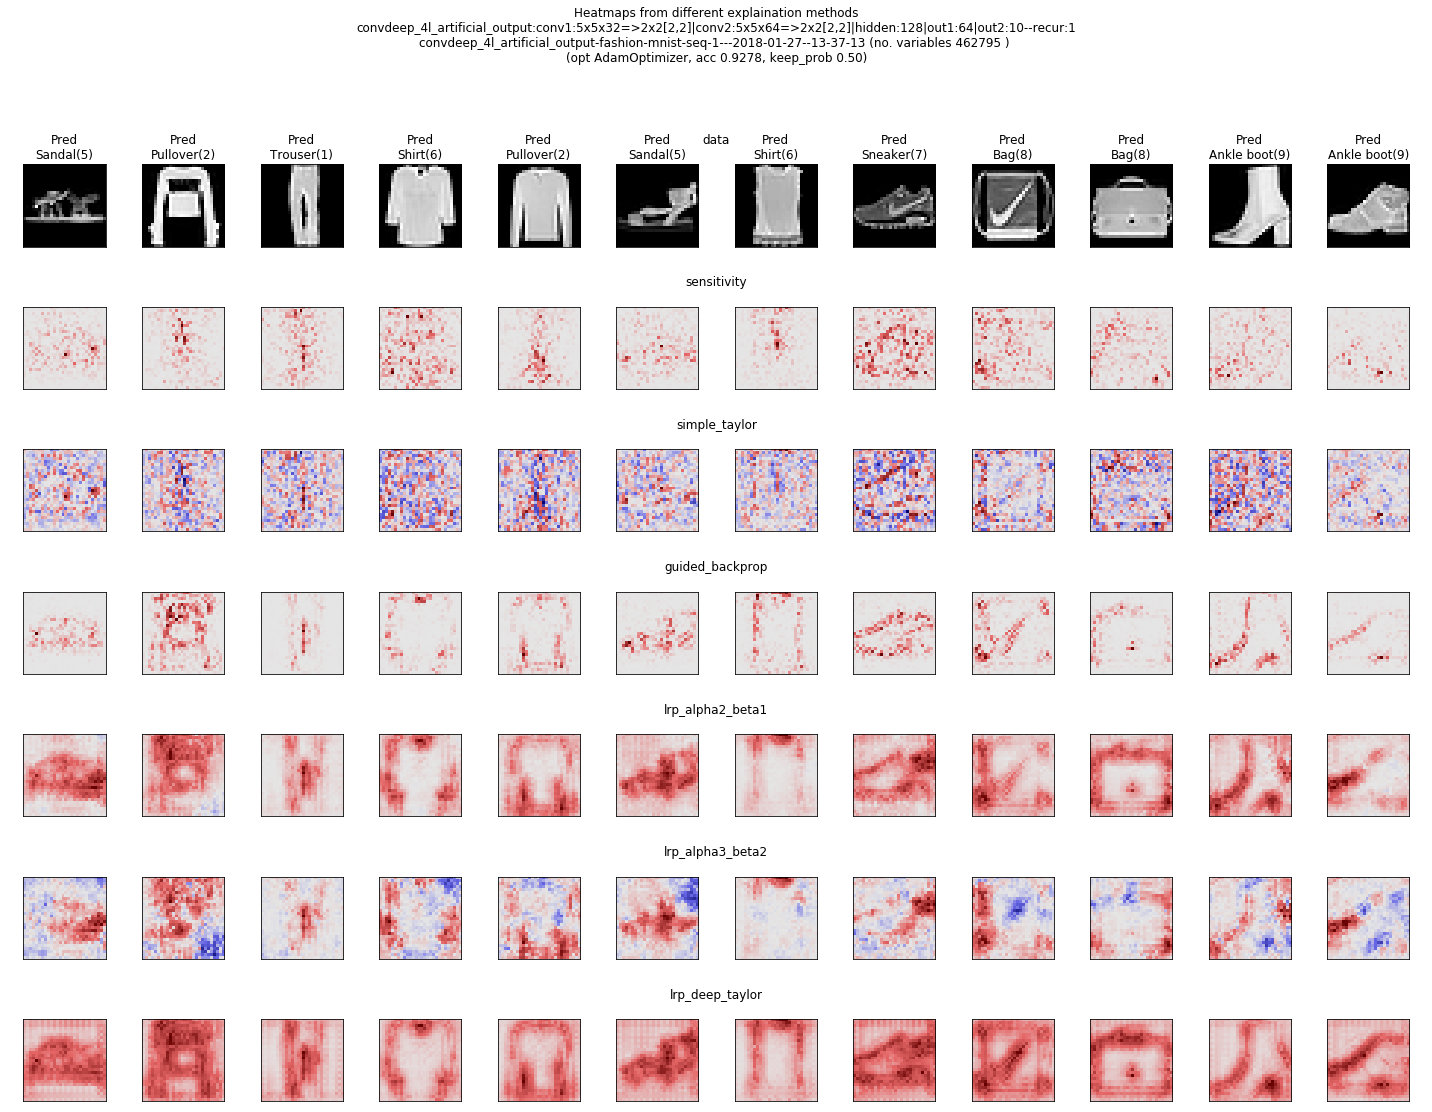

In [62]:
# constant 10
plot.plot_relevance_methods(
    "../experiment-results/aws-training/convdeep_4l_artificial_output-fashion-mnist-seq-1---2018-01-27--13-37-13",
    dataset['fashion-mnist']
    )

In [63]:
import imp
imp.reload(plot)

<module 'notebook_utils.plot' from '/Users/heytitle/projects/heatmapping-tutorial/src/notebook_utils/plot.py'>

In [64]:
    # stats = []
    # plot_aopc_all_dataset('s2', ['sensitivity', 'simple_taylor', 'guided_backprop', 'lrp_deep_taylor'], 1)

In [65]:
# plot_aopc_all_dataset('s2', ['sensitivity', 'simple_taylor', 'guided_backprop', 'lrp_deep_taylor'], 4)

In [66]:
# plot_aopc_all_dataset('s2', ['sensitivity', 'simple_taylor', 'guided_backprop', 'lrp_deep_taylor'], 7)

## Deep

In [67]:
# plot_aopc_all_dataset('s3', ['sensitivity', 'guided_backprop', 'lrp_deep_taylor'], 1)

In [68]:
# plot_aopc_all_dataset('s3', ['sensitivity', 'guided_backprop', 'lrp_deep_taylor'], 4)

In [69]:
# plot_aopc_all_dataset('s3', ['sensitivity', 'guided_backprop', 'lrp_deep_taylor'], 7)

## Deep_4l

In [70]:
# plot_aopc_all_dataset('deep_4l', ['sensitivity', 'guided_backprop', 'lrp_deep_taylor'], 1)

In [71]:
# plot_aopc_all_dataset('deep_4l', ['sensitivity', 'guided_backprop', 'lrp_deep_taylor'], 4)

In [72]:
# plot_aopc_all_dataset('deep_4l', ['sensitivity', 'guided_backprop', 'lrp_deep_taylor'], 7)

## ConvDeep

In [73]:
# plot_aopc_all_dataset('convdeep_4l', ['sensitivity', 'guided_backprop', 'lrp_deep_taylor'], 1)

In [74]:
# plot_aopc_all_dataset('convdeep_4l', ['sensitivity', 'guided_backprop', 'lrp_deep_taylor'], 4)

In [75]:
# plot_aopc_all_dataset('convdeep_4l', ['sensitivity', 'guided_backprop', 'lrp_deep_taylor'], 7)

In [76]:
# import pandas as pd 

# pd.DataFrame(stats).to_csv('aopc3.csv')

# Image Entropy

In [77]:
# import imp
# imp.reload(heatmap_evaluation)
# def plot_image_entropies(networks, dataset_name, seq):
# #     pass
# #     data = dataset[dataset_name]
# #     fig = plt.figure()

# #     ax = fig.add_subplot(111)
# #     ax.spines['top'].set_visible(False)
# #     ax.spines['right'].set_visible(False)

# #     labels = []
# #     last_values = []
# #     print("Entropy of heatmaps from %s testing dataset" % (dataset_name))
# #     for m in networks:
# #         path = model_path(m, dataset_name, seq) s
# #         model_obj = provider.load(model_path(m, dataset_name, seq))
# #         entropy = heatmap_evaluation.image_entropy(model_obj, data.test2d.x[:5,:,:])   
# #         name = provider.network_nickname(model_obj._.architecture_name)
# #         print('%s : %f' % (name, entropy))
              
# # plot_image_entropies(['s2','s3', 'deep_4l', 'convdeep_4l'], 'mnist', 1)

In [78]:
# plot_image_entropies(['s2','s3', 'deep_4l', 'convdeep_4l'], 'mnist', 4)

In [79]:
# plot_image_entropies(['s2','s3', 'deep_4l', 'convdeep_4l'], 'fashion-mnist', 4)